In [1]:
from fastai.vision import *

In [2]:
folder = 'luggage'
file = 'luggage.csv'

In [3]:
path = Path('Data/bags')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [4]:
path.ls()

[WindowsPath('Data/bags/backpack'),
 WindowsPath('Data/bags/backpack.csv'),
 WindowsPath('Data/bags/baggage'),
 WindowsPath('Data/bags/baggage.csv'),
 WindowsPath('Data/bags/book'),
 WindowsPath('Data/bags/book.csv'),
 WindowsPath('Data/bags/cleaned.csv'),
 WindowsPath('Data/bags/export.pkl'),
 WindowsPath('Data/bags/luggage'),
 WindowsPath('Data/bags/luggage.csv'),
 WindowsPath('Data/bags/lunchbox'),
 WindowsPath('Data/bags/lunchbox.csv'),
 WindowsPath('Data/bags/models'),
 WindowsPath('Data/bags/purse'),
 WindowsPath('Data/bags/purse.csv'),
 WindowsPath('Data/bags/umbrella'),
 WindowsPath('Data/bags/umbrella.csv')]

In [5]:
download_images(path/file, dest, max_pics=50,max_workers=0)

In [6]:
folder = 'baggage'
file = 'baggage.csv'
path = Path('Data/bags')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
path.ls()

[WindowsPath('Data/bags/backpack'),
 WindowsPath('Data/bags/backpack.csv'),
 WindowsPath('Data/bags/baggage'),
 WindowsPath('Data/bags/baggage.csv'),
 WindowsPath('Data/bags/book'),
 WindowsPath('Data/bags/book.csv'),
 WindowsPath('Data/bags/cleaned.csv'),
 WindowsPath('Data/bags/export.pkl'),
 WindowsPath('Data/bags/luggage'),
 WindowsPath('Data/bags/luggage.csv'),
 WindowsPath('Data/bags/lunchbox'),
 WindowsPath('Data/bags/lunchbox.csv'),
 WindowsPath('Data/bags/models'),
 WindowsPath('Data/bags/purse'),
 WindowsPath('Data/bags/purse.csv'),
 WindowsPath('Data/bags/umbrella'),
 WindowsPath('Data/bags/umbrella.csv')]

In [7]:
download_images(path/file, dest, max_pics=50,max_workers=0)

In [8]:
folder = 'book'
file = 'book.csv'
path = Path('Data/bags')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
path.ls()
download_images(path/file, dest, max_pics=50,max_workers=0)

In [9]:
folder = 'lunchbox'
file = 'lunchbox.csv'
path = Path('Data/bags')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
path.ls()
download_images(path/file, dest, max_pics=50,max_workers=0)

In [10]:
folder = 'purse'
file = 'purse.csv'
path = Path('Data/bags')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
path.ls()
download_images(path/file, dest, max_pics=50,max_workers=0)

In [11]:
folder = 'backpack'
file = 'backpack.csv'

path = Path('Data/bags')
dest = path/folder

dest.mkdir(parents=True, exist_ok=True)

In [12]:
path.ls()
download_images(path/file, dest, max_pics=50,max_workers=0)

In [13]:
folder = 'umbrella'
file = 'umbrella.csv'
path = Path('Data/bags')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
path.ls()
download_images(path/file, dest, max_pics=50,max_workers=0)

In [14]:
classes = ['luggage','baggage','book', 'lunchbox', 'purse', 'umbrella']

In [15]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

luggage


baggage


book


lunchbox


purse


umbrella


In [16]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [17]:
data.classes

['backpack', 'baggage', 'book', 'luggage', 'lunchbox', 'purse', 'umbrella']

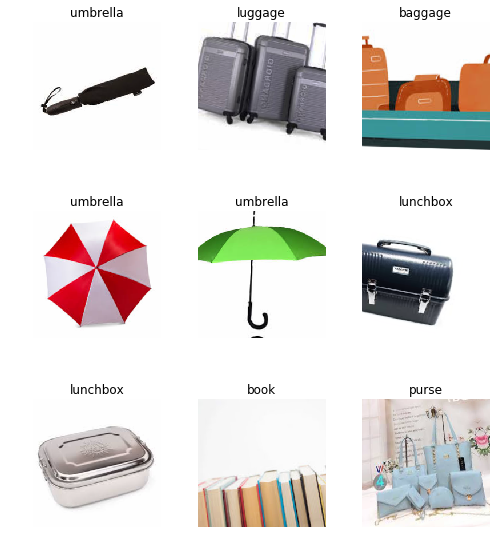

In [18]:
data.show_batch(rows=3, figsize=(7,8))

In [19]:

data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['backpack', 'baggage', 'book', 'luggage', 'lunchbox', 'purse', 'umbrella'],
 7,
 280,
 70)

In [20]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [21]:
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,error_rate,time
0,3.127962,3.070524,0.714286,00:33
1,2.781097,1.494242,0.500000,00:29
2,2.229343,0.778578,0.214286,00:29
3,1.780869,0.614063,0.185714,00:32
4,1.467451,0.548827,0.157143,00:32
5,1.218913,0.513143,0.114286,00:29
6,1.019859,0.502683,0.114286,00:29
7,0.868176,0.554001,0.114286,00:29
8,0.751854,0.612717,0.114286,00:30
9,0.662740,0.617279,0.128571,00:29


In [22]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [23]:
learn.fit_one_cycle(50)

epoch,train_loss,valid_loss,error_rate,time
0,3.451332,2.635360,0.771429,00:30
1,3.068198,1.771177,0.628571,00:29
2,2.728699,1.155091,0.400000,00:30
3,2.417989,0.778479,0.271429,00:29
4,2.113796,0.620845,0.200000,00:30
5,1.780240,0.567616,0.200000,00:30
6,1.541934,0.541153,0.157143,00:30
7,1.337522,0.527184,0.142857,00:29
8,1.165768,0.509742,0.128571,00:29
9,1.022341,0.510866,0.128571,00:29


In [24]:
learn.save('stage-1')

In [25]:
learn.unfreeze()

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [27]:
learn.lr_find(start_lr=1e-5, end_lr=1e-1)

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [28]:
learn.lr_find(start_lr=1e-5, end_lr=1e-1)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [29]:
learn.lr_find(start_lr=1e-5, end_lr=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [30]:
learn.fit_one_cycle(5, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.043011,0.616793,0.128571,00:32
1,0.037665,0.643909,0.128571,00:31
2,0.038728,0.665354,0.114286,00:32
3,0.040396,0.677001,0.171429,00:33
4,0.046246,0.694522,0.157143,00:32


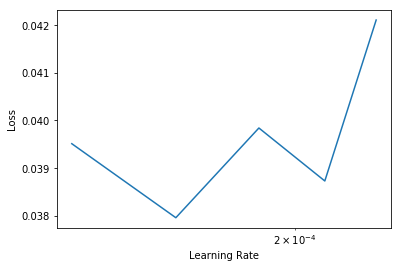

In [31]:
learn.recorder.plot()

In [32]:
learn.fit_one_cycle(5, max_lr=slice(3e-6,3e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.030984,0.705015,0.157143,00:33
1,0.025961,0.710290,0.157143,00:31
2,0.031690,0.708756,0.157143,00:29
3,0.036958,0.706728,0.157143,00:30
4,0.033649,0.709626,0.142857,00:30


In [33]:
learn.save('Stage-2')

In [34]:
learn.load('Stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (280 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
backpack,backpack,backpack,backpack,backpack
Path: Data\bags;

Valid: LabelList (70 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
luggage,umbrella,umbrella,lunchbox,luggage
Path: Data\bags;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, 

In [35]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [36]:
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,error_rate,time
0,2.772223,2.006243,0.728571,00:29
1,2.397073,0.891420,0.300000,00:29
2,1.898109,0.497778,0.185714,00:29
3,1.481411,0.427052,0.142857,00:29
4,1.185764,0.398486,0.114286,00:30
5,0.981360,0.357596,0.114286,00:30
6,0.834689,0.365500,0.114286,00:29
7,0.725133,0.353503,0.128571,00:29
8,0.629955,0.330859,0.128571,00:29
9,0.556614,0.335584,0.114286,00:29


In [37]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [38]:
learn.fit_one_cycle(80)

epoch,train_loss,valid_loss,error_rate,time
0,2.836037,2.177331,0.714286,00:39
1,2.232111,1.033718,0.357143,00:34
2,1.762843,0.596029,0.200000,00:31
3,1.425098,0.456401,0.142857,00:30
4,1.180680,0.458410,0.142857,00:32
5,1.008326,0.492239,0.157143,00:34
6,0.860343,0.508808,0.157143,00:34
7,0.736347,0.500528,0.142857,00:34
8,0.642068,0.498727,0.114286,00:33
9,0.568176,0.504311,0.100000,00:32


In [39]:
learn.save('stage-6')

In [40]:
learn.unfreeze()

In [41]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


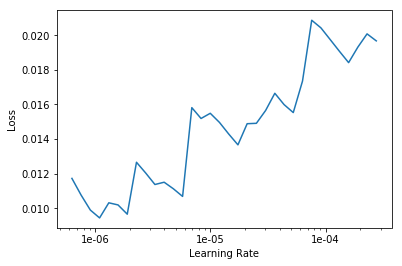

In [42]:
learn.recorder.plot()

In [43]:
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.024066,0.586500,0.100000,00:31
1,0.019826,0.591855,0.100000,00:30
2,0.017810,0.563587,0.114286,00:30
3,0.016375,0.568817,0.085714,00:31
4,0.021432,0.579822,0.071429,00:31


In [44]:
learn.fit_one_cycle(10, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.005546,0.591282,0.085714,00:31
1,0.013247,0.632353,0.100000,00:31
2,0.016818,0.636133,0.100000,00:31
3,0.014562,0.633333,0.085714,00:31
4,0.012257,1.082164,0.142857,00:31
5,0.016865,1.070525,0.128571,00:31
6,0.027556,1.055607,0.114286,00:31
7,0.033107,0.983759,0.114286,00:31
8,0.032999,0.944447,0.114286,00:31
9,0.033324,0.930493,0.114286,00:31


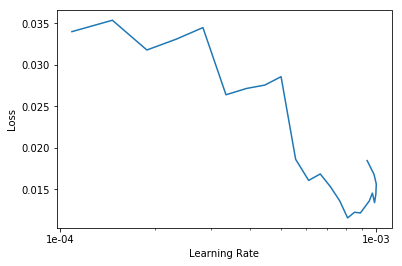

In [45]:
learn.recorder.plot()

In [46]:
learn.fit_one_cycle(10, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.037006,0.883218,0.114286,00:31
1,0.038500,0.721127,0.100000,00:31
2,0.043102,0.889659,0.185714,00:31
3,0.080761,2.023206,0.285714,00:31
4,0.129345,3.218547,0.328571,00:31
5,0.133794,2.915323,0.328571,00:31
6,0.141173,2.049417,0.257143,00:31
7,0.136604,1.635669,0.228571,00:31
8,0.130776,1.308490,0.200000,00:31
9,0.117570,1.135694,0.214286,00:31


In [47]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [48]:
learn.fit_one_cycle(80)

epoch,train_loss,valid_loss,error_rate,time
0,3.064317,1.689574,0.571429,00:30
1,2.423701,0.948205,0.300000,00:30
2,1.947365,0.588815,0.185714,00:31
3,1.575888,0.470284,0.157143,00:30
4,1.306214,0.439325,0.100000,00:30
5,1.106575,0.446828,0.114286,00:30
6,0.942807,0.447895,0.085714,00:30
7,0.807829,0.454849,0.085714,00:30
8,0.705453,0.437577,0.085714,00:30
9,0.617280,0.413018,0.100000,00:32


In [49]:
interp = ClassificationInterpretation.from_learner(learn)

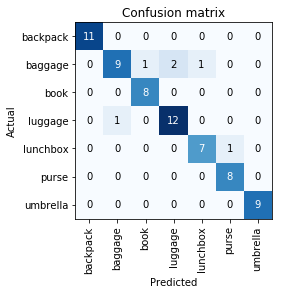

In [50]:
interp.plot_confusion_matrix()

In [51]:
from fastai.widgets import *

In [52]:
losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [53]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [54]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

In [55]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [56]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [57]:
ds, idxs = DatasetFormatter().from_toplosses(learn)
ImageCleaner(ds, idxs, path) 

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [58]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [59]:
learn.export()

In [60]:
defaults.device = torch.device('cpu')

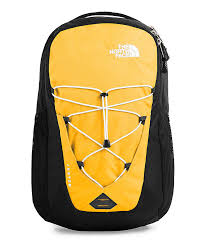

In [61]:
img = open_image(path/'backpack'/'00000021.jpg')
img

In [62]:
learn = load_learner(path)

In [63]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category backpack

In [64]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [65]:
learn.fit_one_cycle(20, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,2.009623,12.605538,0.771429,00:32
1,2.498584,118.599472,0.900000,00:31
2,3.654778,2329.433105,0.885714,00:30
3,5.379826,62581.699219,0.885714,00:30
4,7.537291,329339.812500,0.885714,00:30
5,11.140545,157498.218750,0.885714,00:30
6,14.207729,161646.671875,0.885714,00:29
7,17.540260,30106.220703,0.814286,00:29
8,21.586567,7560.512695,0.800000,00:30
9,22.366484,2680.884521,0.842857,00:30


In [66]:
interp = ClassificationInterpretation.from_learner(learn)

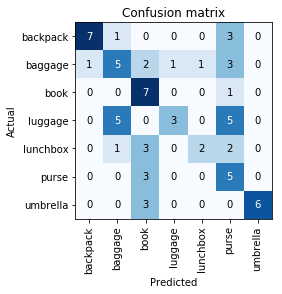

In [67]:
interp.plot_confusion_matrix()

In [68]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [69]:
learn.fit_one_cycle(80)

epoch,train_loss,valid_loss,error_rate,time
0,2.993073,2.154799,0.685714,00:31
1,2.349267,1.102902,0.457143,00:31
2,1.880378,0.670119,0.200000,00:31
3,1.539397,0.538305,0.171429,00:32
4,1.279034,0.489359,0.128571,00:31
5,1.103942,0.479715,0.085714,00:30
6,0.953828,0.506157,0.085714,00:31
7,0.815851,0.554853,0.085714,00:31
8,0.716530,0.607950,0.100000,00:32
9,0.632255,0.547814,0.100000,00:38


In [70]:
interp = ClassificationInterpretation.from_learner(learn)

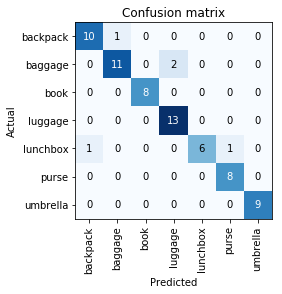

In [71]:
interp.plot_confusion_matrix() 

In [72]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

In [73]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [74]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [75]:
ds, idxs = DatasetFormatter().from_toplosses(learn)
ImageCleaner(ds, idxs, path) 

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [76]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [77]:
learn.export()

In [78]:
defaults.device = torch.device('cpu')

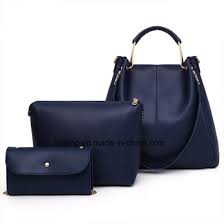

In [79]:
img = open_image(path/'purse'/'00000021.jpg')
img

In [80]:
learn = load_learner(path)

In [81]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category purse

In [82]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [83]:
learn.fit_one_cycle(20, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,1.826943,13.133293,0.700000,00:33
1,2.267037,86.204056,0.828571,00:33
2,3.622307,2480.729248,0.885714,00:32
3,4.885908,99304.156250,0.885714,00:32
4,6.889894,74907.914062,0.871429,00:31
5,11.522258,253842.234375,0.885714,00:31
6,16.841335,399866.312500,0.885714,00:32
7,21.308432,440886.812500,0.885714,00:30
8,22.879749,108680.742188,0.885714,00:30
9,23.412426,26649.900391,0.885714,00:29


In [84]:
learn.save('stage-7')

In [85]:
learn = cnn_learner(data,models.resnet34, metrics=error_rate)

In [86]:
learn.fit_one_cycle(5, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,3.141503,3.395505,0.800000,00:29
1,3.106535,2.838541,0.814286,00:29
2,3.100043,2.607474,0.828571,00:29
3,3.076685,2.512464,0.857143,00:29
4,3.088612,2.473945,0.857143,00:29


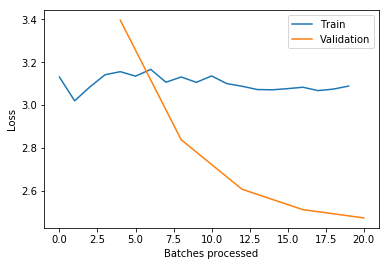

In [87]:
learn.recorder.plot_losses()

In [88]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [89]:
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,error_rate,time
0,3.042979,2.924598,0.885714,00:30
1,3.122927,2.052336,0.885714,00:29
2,3.069726,1.994939,0.828571,00:29
3,3.001912,2.071151,0.871429,00:30
4,2.910980,2.019651,0.928571,00:30
5,2.870834,2.080085,0.857143,00:29
6,2.820155,2.096183,0.842857,00:29
7,2.756727,2.161090,0.857143,00:29
8,2.714883,2.040346,0.828571,00:30
9,2.659321,1.832440,0.642857,00:30


In [91]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [92]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [93]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,2.903898,3.736533,0.800000,00:30
1,2.793623,3.423912,0.787302,00:20
2,2.784015,3.167023,0.784127,00:20
3,2.679421,2.925125,0.787302,00:20
4,2.542943,2.722351,0.774603,00:20
5,2.433088,2.501416,0.752381,00:20
6,2.287541,2.295640,0.742857,00:20
7,2.117171,2.108140,0.730159,00:20
8,1.930837,1.931086,0.663492,00:20
9,1.768129,1.767487,0.625397,00:21


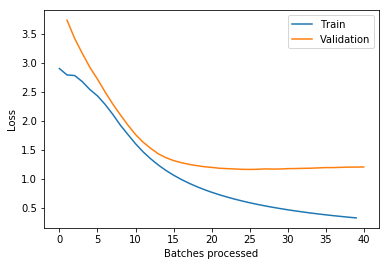

In [94]:
learn.recorder.plot_losses()

In [95]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [96]:
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,error_rate,time
0,3.226753,54.257969,0.860317,00:21
1,3.304483,24.863091,0.863492,00:19
2,3.073992,12.805337,0.853968,00:19
3,2.952991,6.480501,0.847619,00:19
4,2.781618,4.441984,0.841270,00:19
5,2.673982,3.486615,0.828571,00:19
6,2.514075,3.023689,0.841270,00:19
7,2.374257,2.809852,0.844444,00:19
8,2.266551,2.590995,0.806349,00:19
9,2.178695,2.513705,0.841270,00:19


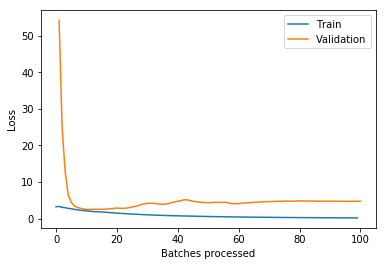

In [97]:
learn.recorder.plot_losses()

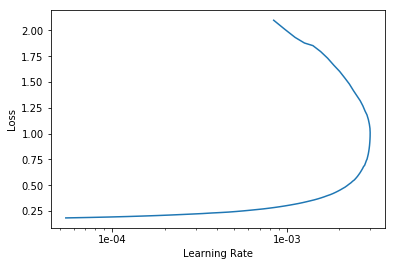

In [98]:
learn.recorder.plot()

In [99]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy, pretrained=False)

In [100]:
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,accuracy,time
0,3.509509,2.450602,0.123810,00:22
1,3.272929,2.011075,0.142857,00:20
2,3.194109,2.230278,0.130159,00:22
3,3.013064,2.551750,0.133333,00:23
4,2.881009,2.885496,0.133333,00:22
5,2.851197,3.102255,0.133333,00:21
6,2.746938,3.151938,0.133333,00:20
7,2.702167,3.071725,0.133333,00:21
8,2.600255,3.160488,0.152381,00:20
9,2.520715,3.813547,0.142857,00:21


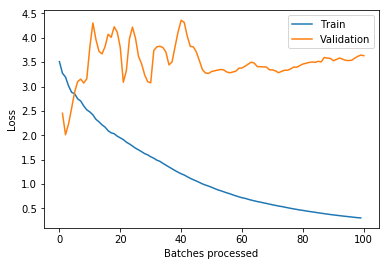

In [101]:
learn.recorder.plot_losses()

In [102]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy, pretrained=False)

In [103]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,3.330008,68.438301,0.142857,00:33
1,3.112360,20.410002,0.123810,00:31
2,2.956707,15.188004,0.155556,00:31
3,2.585143,11.312196,0.152381,00:31
4,2.449036,8.645839,0.142857,00:30
5,2.340756,5.310277,0.161905,00:31
6,2.253146,3.677732,0.136508,00:30
7,2.087617,2.836802,0.158730,00:30
8,2.011124,2.303627,0.212698,00:30
9,1.906829,2.256157,0.152381,00:21


In [104]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [105]:
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,error_rate,time
0,2.659031,44.678745,0.873016,00:20
1,2.579450,18.507610,0.866667,00:22
2,2.610434,9.034127,0.860317,00:31
3,2.626457,5.101382,0.857143,00:28
4,2.561082,2.957323,0.841270,00:27
5,2.471550,2.305487,0.847619,00:25
6,2.379099,2.118520,0.847619,00:20
7,2.271245,2.035191,0.853968,00:23
8,2.205140,2.008056,0.825397,00:28
9,2.174853,2.025264,0.815873,00:26


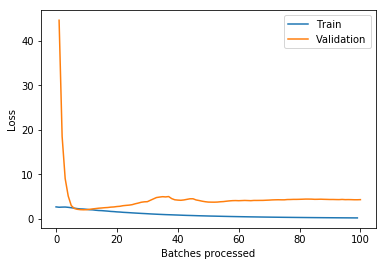

In [106]:
learn.recorder.plot_losses()